# Setup
We need datasets, dataloaders, and code to train and evaluate models

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
from models import *
from data_structures import *
from helpers import load_from_hdf5

In [3]:
X, y = load_from_hdf5(filename="../../engine_final_scaled.h5")

In [4]:
y_hs = X[:, 0, 44]
X = X[:, :, :44]
print(y_hs.shape)
print(X.shape)
print(y.shape)

(500000,)
(500000, 50, 44)
(500000,)


In [17]:
threshold = 20
idxs = np.where(y_hs < threshold)[0]
X_threshold = X[idxs]
y_threshold = y[idxs]

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# 1d CNN
First, let's try a one dimensional CNN to capture temporal relationships within each feature.

In [6]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

Train set size: 400000, Test set size: 100000


In [7]:
num_feats = 44
model = CNNRULRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20 
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 585.0929, Test Loss: 207.0237
Epoch 2/20, Train Loss: 111.5425, Test Loss: 99.4622
Epoch 3/20, Train Loss: 96.0884, Test Loss: 93.5042
Epoch 4/20, Train Loss: 90.5469, Test Loss: 87.9529
Epoch 5/20, Train Loss: 85.3175, Test Loss: 84.1862
Epoch 6/20, Train Loss: 80.5278, Test Loss: 78.3959
Epoch 7/20, Train Loss: 76.0247, Test Loss: 73.8195
Epoch 8/20, Train Loss: 72.1017, Test Loss: 70.2100
Epoch 9/20, Train Loss: 68.5156, Test Loss: 66.4956
Epoch 10/20, Train Loss: 65.2090, Test Loss: 63.2617
Epoch 11/20, Train Loss: 62.1371, Test Loss: 60.1744
Epoch 12/20, Train Loss: 59.2859, Test Loss: 59.7496
Epoch 13/20, Train Loss: 56.7660, Test Loss: 55.9526
Epoch 14/20, Train Loss: 54.5092, Test Loss: 53.0049
Epoch 15/20, Train Loss: 52.7743, Test Loss: 51.3134
Epoch 16/20, Train Loss: 51.0715, Test Loss: 51.8512
Epoch 17/20, Train Loss: 49.7112, Test Loss: 48.2181
Epoch 18/20, Train Loss: 48.4800, Test Loss: 47.5568
Epoch 19/20, Train Loss: 47.2836, Test Loss: 46.8072

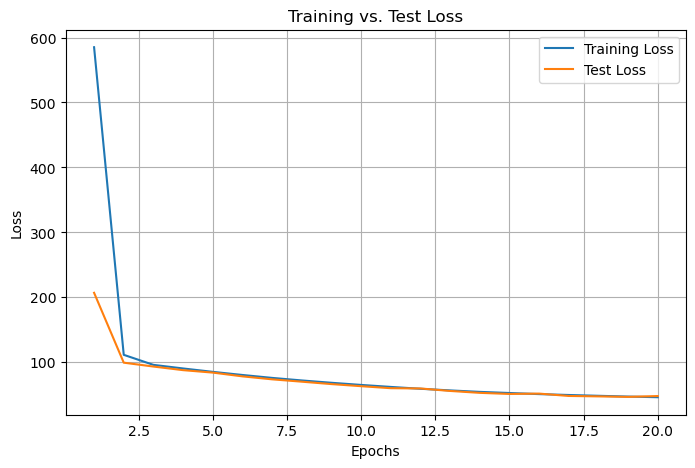

In [8]:
plot_loss(history)

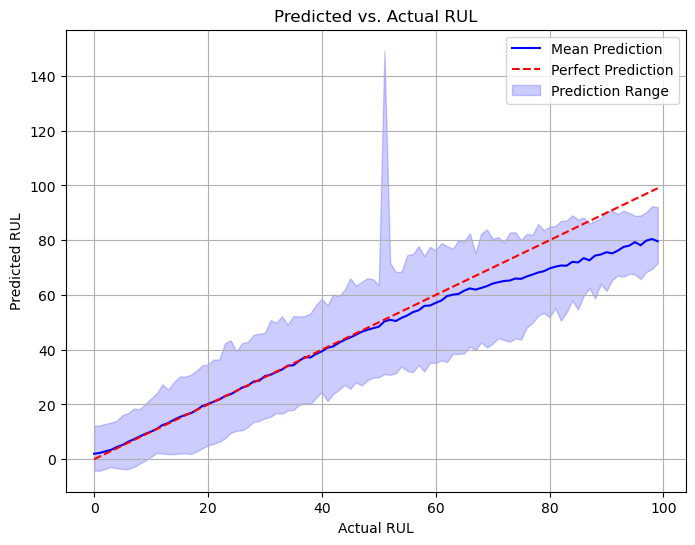

In [9]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [10]:
torch.save(model.state_dict(), 'state_dicts/baseline_state_dict.pth')

# 2d CNN
Now, let's try out a two dimensional CNN to capture interactions among features.

In [11]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [12]:
num_feats = 44
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20 

In [13]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 481.4951, Test Loss: 133.3896
Epoch 2/20, Train Loss: 110.5404, Test Loss: 101.1573
Epoch 3/20, Train Loss: 96.1761, Test Loss: 93.3354
Epoch 4/20, Train Loss: 88.3841, Test Loss: 85.1064
Epoch 5/20, Train Loss: 81.8370, Test Loss: 79.0464
Epoch 6/20, Train Loss: 75.9867, Test Loss: 74.2371
Epoch 7/20, Train Loss: 70.5496, Test Loss: 68.0125
Epoch 8/20, Train Loss: 65.6830, Test Loss: 63.4238
Epoch 9/20, Train Loss: 61.3310, Test Loss: 59.3950
Epoch 10/20, Train Loss: 57.5427, Test Loss: 55.9389
Epoch 11/20, Train Loss: 54.1231, Test Loss: 53.0500
Epoch 12/20, Train Loss: 51.1528, Test Loss: 49.8934
Epoch 13/20, Train Loss: 48.5926, Test Loss: 47.8963
Epoch 14/20, Train Loss: 46.3497, Test Loss: 45.3997
Epoch 15/20, Train Loss: 44.4562, Test Loss: 43.6229
Epoch 16/20, Train Loss: 42.8599, Test Loss: 42.2396
Epoch 17/20, Train Loss: 41.5427, Test Loss: 40.9136
Epoch 18/20, Train Loss: 40.3662, Test Loss: 39.9375
Epoch 19/20, Train Loss: 39.3116, Test Loss: 39.596

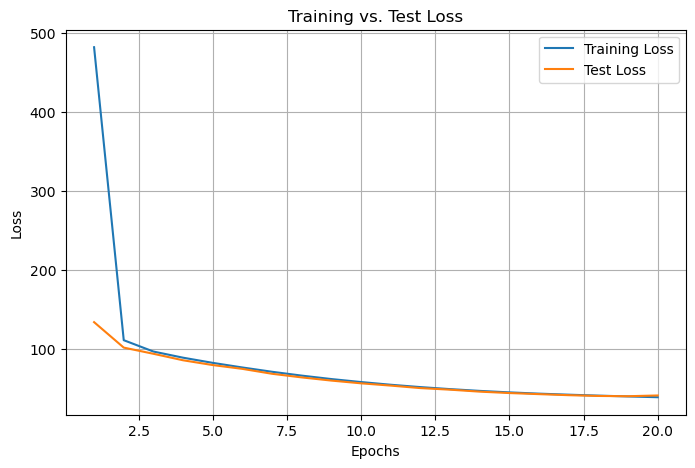

In [14]:
plot_loss(history)

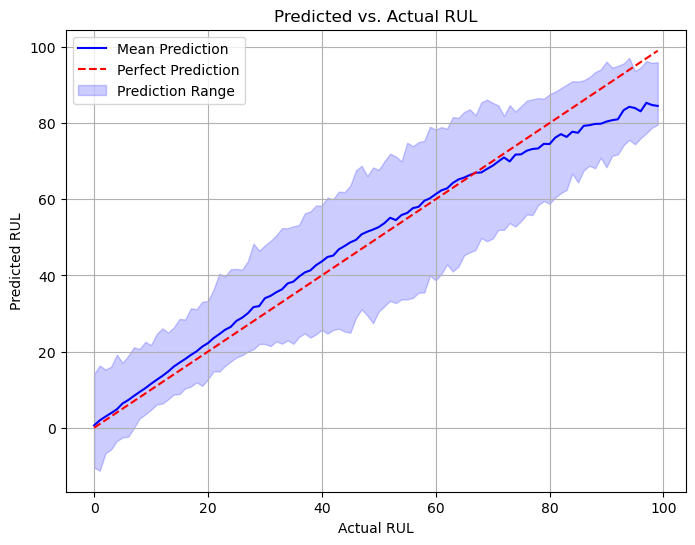

In [15]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [16]:
torch.save(model.state_dict(), 'state_dicts/2d_baseline_state_dict.pth')

# Hybrid CNN
Now, let's try a hybrid CNN that uses both 1d and 2d convolutions.

In [17]:
train_loader, test_loader = create_train_test_dataloaders(X, y)

Train set size: 400000, Test set size: 100000


In [18]:
num_feats = 44
seq_length = 50  
model = HybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 414.8192, Test Loss: 154.9831
Epoch 2/20, Train Loss: 114.4205, Test Loss: 100.5858
Epoch 3/20, Train Loss: 94.7158, Test Loss: 90.1659
Epoch 4/20, Train Loss: 86.3942, Test Loss: 82.3945
Epoch 5/20, Train Loss: 79.5305, Test Loss: 75.9043
Epoch 6/20, Train Loss: 73.3605, Test Loss: 70.0486
Epoch 7/20, Train Loss: 67.9850, Test Loss: 64.9515
Epoch 8/20, Train Loss: 63.2206, Test Loss: 60.7965
Epoch 9/20, Train Loss: 59.1268, Test Loss: 56.7047
Epoch 10/20, Train Loss: 55.7703, Test Loss: 53.6872
Epoch 11/20, Train Loss: 53.1030, Test Loss: 51.3821
Epoch 12/20, Train Loss: 50.9560, Test Loss: 49.4698
Epoch 13/20, Train Loss: 49.3743, Test Loss: 48.4467
Epoch 14/20, Train Loss: 48.0740, Test Loss: 47.1024
Epoch 15/20, Train Loss: 47.0102, Test Loss: 46.4974
Epoch 16/20, Train Loss: 46.1387, Test Loss: 45.2280
Epoch 17/20, Train Loss: 45.4210, Test Loss: 45.8885
Epoch 18/20, Train Loss: 44.7998, Test Loss: 44.1483
Epoch 19/20, Train Loss: 44.2056, Test Loss: 43.419

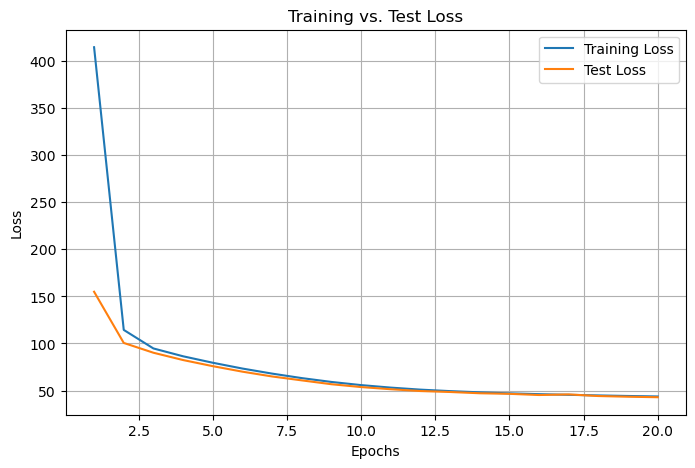

In [19]:
plot_loss(history)

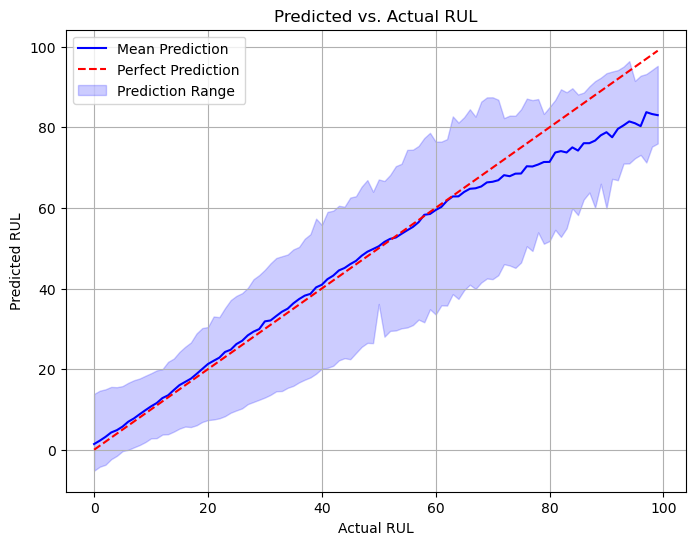

In [20]:
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [21]:
torch.save(model.state_dict(), 'state_dicts/hybrid_baseline_state_dict.pth')

# More Complex Hybrid Model
The simple hybrid model wasn't quite as performant as the 2D model, so let's try a slightly deeper hybrid model to see if we can get the benefits of our 1D and 2D models in one.

In [22]:
num_feats = 44
seq_length = 50  
model = ComplexHybridCNNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

In [23]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 115.4231, Test Loss: 830.6752
Epoch 2/20, Train Loss: 42.4710, Test Loss: 834.4285
Epoch 3/20, Train Loss: 69.4147, Test Loss: 795.6052
Epoch 4/20, Train Loss: 45.5478, Test Loss: 775.2194
Epoch 5/20, Train Loss: 33.0175, Test Loss: 824.7877


KeyboardInterrupt: 

In [ ]:
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)

In [ ]:
torch.save(model.state_dict(), 'state_dicts/complex_hybrid_state_dict.pth')

# 2D CNN with Custom Loss Function
Now, let's try a 2D CNN that uses both 1d and 2d convolutions, this time with a custom loss function that penalizes overestimations more then underestimations. The 2D baseline was most performant, so that's the route we'll take. Ideally, we should see that the graph of actual versus predicted RULs shows fewer overesimates. 

In [25]:
train_loader, test_loader = create_train_test_dataloaders(X, y, dim="2d")

Train set size: 400000, Test set size: 100000


In [26]:
num_feats = 44
seq_length = 50  
model = CNNRUL2DRegression(num_features=num_feats).to(device)
criterion = AsymmetricHuberLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 21.2172, Test Loss: 12.8403
Epoch 2/20, Train Loss: 11.7998, Test Loss: 11.1298
Epoch 3/20, Train Loss: 10.4541, Test Loss: 9.9297
Epoch 4/20, Train Loss: 9.4288, Test Loss: 9.2287
Epoch 5/20, Train Loss: 8.6547, Test Loss: 8.3342
Epoch 6/20, Train Loss: 8.0600, Test Loss: 7.8251
Epoch 7/20, Train Loss: 7.5843, Test Loss: 7.4052
Epoch 8/20, Train Loss: 7.1811, Test Loss: 6.9879
Epoch 9/20, Train Loss: 6.8641, Test Loss: 6.7222
Epoch 10/20, Train Loss: 6.6434, Test Loss: 6.5828
Epoch 11/20, Train Loss: 6.4699, Test Loss: 6.3861
Epoch 12/20, Train Loss: 6.3248, Test Loss: 6.3444
Epoch 13/20, Train Loss: 6.1864, Test Loss: 6.0962
Epoch 14/20, Train Loss: 6.0614, Test Loss: 6.0331
Epoch 15/20, Train Loss: 5.9424, Test Loss: 5.8871
Epoch 16/20, Train Loss: 5.8320, Test Loss: 5.9847
Epoch 17/20, Train Loss: 5.7228, Test Loss: 5.8375
Epoch 18/20, Train Loss: 5.6189, Test Loss: 5.5391
Epoch 19/20, Train Loss: 5.5166, Test Loss: 5.4338
Epoch 20/20, Train Loss: 5.4214, Te

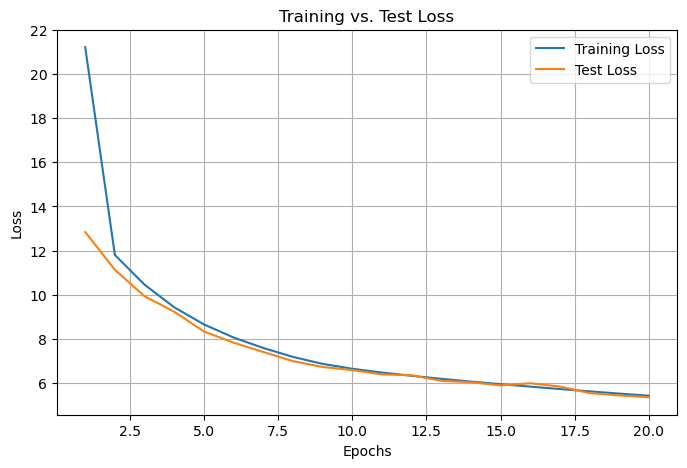

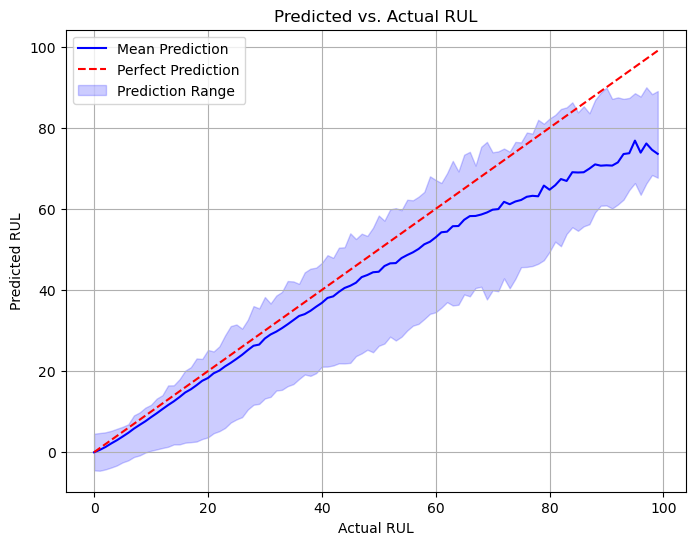

In [27]:
plot_loss(history)
plot_rul_predictions(model, test_loader, device, aggregate=True, shaded_region=True)

In [28]:
torch.save(model.state_dict(), 'state_dicts/custom_loss_state_dict.pth')

# Temporal CNN
Our more complex hybrid CNN was massively overfitting, so let's go in a different direction. Let's try a temporal CNN instead. 

In [ ]:
num_feats = 44
seq_length = 50
model = TCNRegression(num_features=num_feats, seq_length=seq_length).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 20

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)

In [ ]:
plot_rul_predictions(model, test_loader, device)